## Import required libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

## Generate random data for the social media data

In [60]:
categories = [ "Food", "Travel", "Fashion", "Fitness", "Music", "Culture", "Family", "Health"]

data = {'Date' : pd.date_range(start = '2021-01-01', periods = 500), 
        'Categories': [rd.choice(categories) for i  in range(500)], 
        'Likes':  np.random.randint(0, 10000, size=500) }

## Load the data into a Pandas DataFrame

In [61]:
df = pd.DataFrame(data)

In [62]:
print(df)

          Date Categories  Likes
0   2021-01-01    Fitness    569
1   2021-01-02    Culture   7218
2   2021-01-03     Health   2599
3   2021-01-04     Health   1444
4   2021-01-05    Fashion   7222
..         ...        ...    ...
495 2022-05-11     Health   3054
496 2022-05-12    Culture   8418
497 2022-05-13       Food   1365
498 2022-05-14     Health   3297
499 2022-05-15       Food   4693

[500 rows x 3 columns]


## Explore the data

In [63]:
df.head()

,Date,Categories,Likes
0,2021-01-01,Fitness,569
1,2021-01-02,Culture,7218
2,2021-01-03,Health,2599
3,2021-01-04,Health,1444
4,2021-01-05,Fashion,7222


In [64]:
df.describe()

,Date,Likes
count,500,500.000000
mean,2021-09-07 12:00:00,4881.258000
min,2021-01-01 00:00:00,10.000000
25%,2021-05-05 18:00:00,2324.750000
50%,2021-09-07 12:00:00,4896.500000
75%,2022-01-10 06:00:00,7340.500000
max,2022-05-15 00:00:00,9993.000000
std,NaN,2877.545108


In [65]:
df.value_counts('Categories')

Categories
Fashion    79
Food       70
Family     64
Fitness    62
Music      61
Culture    55
Health     55
Travel     54
Name: count, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        500 non-null    datetime64[ns]
 1   Categories  500 non-null    object        
 2   Likes       500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


## Clean the data

In [67]:
# Remove the empty rows
new_df = df.dropna(inplace = True)

In [68]:
 # Remove the duplicate rows
df.drop_duplicates(inplace = True)

In [69]:
# Convert the 'Date' field to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert the 'Likes' field to integer
df['Likes'] = df['Likes'].astype(int)

In [70]:
# Display the updated DataFrame
print(df.info())  # Show data types to confirm changes
print(df)  # Print DataFrame with converted columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        500 non-null    datetime64[ns]
 1   Categories  500 non-null    object        
 2   Likes       500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None
          Date Categories  Likes
0   2021-01-01    Fitness    569
1   2021-01-02    Culture   7218
2   2021-01-03     Health   2599
3   2021-01-04     Health   1444
4   2021-01-05    Fashion   7222
..         ...        ...    ...
495 2022-05-11     Health   3054
496 2022-05-12    Culture   8418
497 2022-05-13       Food   1365
498 2022-05-14     Health   3297
499 2022-05-15       Food   4693

[500 rows x 3 columns]


## Visualize and Analyze the data

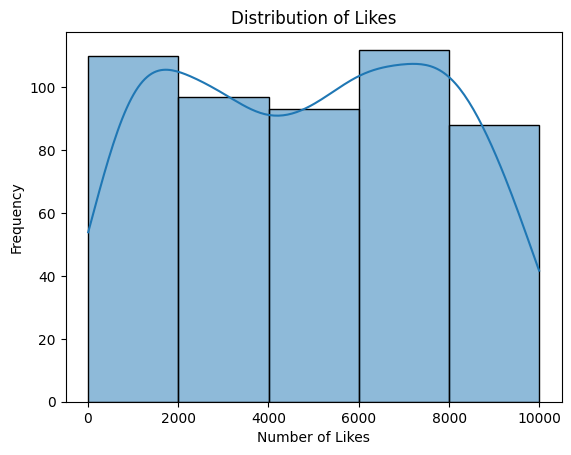

In [71]:
# Histogram plot of 'Likes'
sns.histplot(df['Likes'], bins=5, kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()

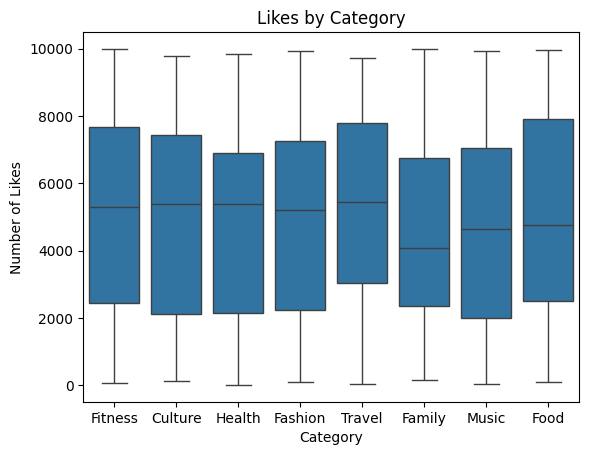

In [72]:
# Boxplot with 'Category' on x-axis and 'Likes' on y-axis
sns.boxplot(x='Categories', y='Likes', data=df)
plt.title('Likes by Category')
plt.xlabel('Category')
plt.ylabel('Number of Likes')
plt.show()

In [73]:
# Calculate and print the mean of 'Likes'
mean_likes = df['Likes'].mean()
print(f"Mean of Likes: {mean_likes}")

Mean of Likes: 4881.258


In [74]:
# Group by 'Category' and print the mean of 'Likes'
category_mean_likes = df.groupby('Categories')['Likes'].mean()
print("\nMean Likes by Category:")
print(category_mean_likes)


Mean Likes by Category:
Categories
Culture    4871.690909
Family     4557.734375
Fashion    4898.848101
Fitness    5050.516129
Food       5056.514286
Health     4833.872727
Music      4556.049180
Travel     5242.814815
Name: Likes, dtype: float64


# Conclusion and Key Findings

Throughout this project, I followed a structured approach to analyze social media data, focusing on the engagement metrics (Likes) across various content categories such as **Food, Travel, Fashion, Fitness, and Music.** My process involved data preparation, visualization, and statistical analysis to derive meaningful insights.

## Process Overview

### Data Preparation:
- Loaded the dataset and converted the **'Date'** field to a proper datetime format to facilitate time-based analysis.
- Transformed the **'Likes'** field to integer data type for accurate numerical computations.

### Data Visualization:
- Used Seaborn's `histplot` to visualize the distribution of Likes, identifying patterns and potential outliers.
- Implemented a `boxplot` to analyze the spread of Likes across different content categories.

### Statistical Analysis:
- Calculated the overall mean of Likes to understand the average engagement.
- Leveraged the `groupby` function to find category-specific engagement trends.

## Key Findings

- The **histogram plot** indicates that the distribution of Likes follows a multimodal pattern, with the majority of posts receiving between **2000 and 8000 Likes.** There is a noticeable peak around the **6000-8000** range, suggesting that a large number of posts achieve moderate engagement levels.

- The **boxplot** shows significant variability in Likes across different categories. Categories such as **"Travel"** and **"Health"** tend to receive a higher median number of Likes, with **"Travel"** having a wider interquartile range, suggesting higher engagement but also more variability.

- The **"Food"** category shows a relatively consistent performance with fewer extreme values compared to other categories, indicating it may be a reliable performer in terms of engagement.

- **"Fashion"** and **"Fitness"** categories exhibit more outliers, indicating that while some posts perform exceptionally well, others may struggle to gain traction.
